# Scene Segmentation Experiment for ADE20K

This notebook will investigate training the Proglearn classification forest on scene segmentation using the ADE20K dataset, http://groups.csail.mit.edu/vision/datasets/ADE20K/


**Import packages**

In [56]:
import numpy as np
import cv2
import os
import zipfile
import matplotlib.pyplot as plt

import treefunctions as fn      # original python file

# Loading Data

The following is code taken from Narayani Wagle to pre-process and flatten the images.

In [57]:
# (OPTIONAL) RUN THIS CELL TO UNZIP DATA FROM SITE

# CHANGE PATH TO WHERE YOU HAVE YOUR ZIP FILE LOCATED
path_to_zipfile = 'C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency.zip'

# don't change this
directory_to_extract_to = './'
with zipfile.ZipFile(path_to_zipfile, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [58]:
# RUN THIS CELL TO LOAD DATA AND SORT INTO SAMPLES AND LABELS

# CHANGE PATH TO ROOT DIRECTORY OF WHERE YOUR DATA IS LOCATED
# e.g. ./projects/
dataloc = 'C:/Users/Amy/Documents/Python/Neuro Data Design/'

# don't change this
datadir = dataloc + 'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/'
imgkeys = [im.split('_seg')[0] for im in os.listdir(datadir) if '_seg' in im]
lblpaths = [datadir+im for im in os.listdir(datadir) if '_seg' in im]
imgpaths = [datadir+im for im in os.listdir(datadir) if '.jpg' in im and im.split('.jpg')[0] in imgkeys]


imgpaths.sort()
lblpaths.sort()
print('Total # of images =', len(imgpaths))
print('Total # of labels =', len(lblpaths))
imgpaths[:5], lblpaths[:5]

Total # of images = 64
Total # of labels = 64


(['C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/ADE_val_00001001.jpg',
  'C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/ADE_val_00001005.jpg',
  'C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/ADE_val_00001015.jpg',
  'C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/ADE_val_00001034.jpg',
  'C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/ADE_val_00001054.jpg'],
 ['C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/ADE_val_00001001_seg.png',
  'C:/Users/Amy/Documents/Python/Neuro Data Design/ADE20K_2017_05_30_consistency/images/consistencyanalysis/origi

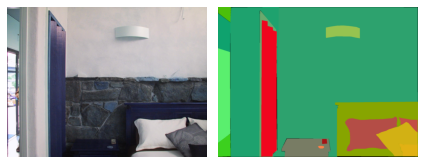

In [59]:
# VIEW SAMPLE
fig, ax = plt.subplots(1,2)
img = cv2.imread(imgpaths[14])
lbl = cv2.imread(lblpaths[14]) 
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(lbl)
ax[1].axis('off')
plt.show()

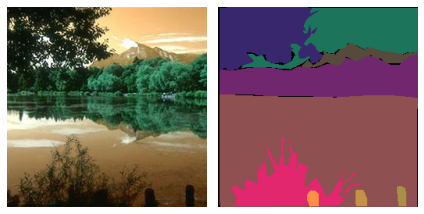

In [60]:
# VIEW SAMPLE
fig, ax = plt.subplots(1,2)
img = cv2.imread(imgpaths[32])
lbl = cv2.imread(lblpaths[32]) 
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(lbl)
ax[1].axis('off')
plt.show()

In [91]:
def load_images(flatten_imgs):
    if flatten_imgs:
        X = np.array([cv2.imread(imgpath).flatten() for imgpath in imgpaths])
        Y = np.array([cv2.imread(lblpath).flatten() for lblpath in lblpaths])
    else:
        X = np.array([cv2.imread(imgpath) for imgpath in imgpaths])
        Y = np.array([cv2.imread(lblpath) for lblpath in lblpaths])
    return X,Y

In [97]:
# change flatten_imgs to True or False depending on how you want to load the data
flatten_imgs = False
X, Y = load_images(flatten_imgs)
print(X.shape, X[0], X[0].shape)

(64,) [[[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [ 48  69 100]
  [ 48  72 100]
  [ 46  73  99]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [ 49  70 101]
  [ 44  68  96]
  [ 42  69  95]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [ 47  71 101]
  [ 44  71  98]
  [ 44  71  98]]

 ...

 [[ 35  34  30]
  [ 35  34  30]
  [ 32  33  31]
  ...
  [210 213 188]
  [204 202 192]
  [202 197 194]]

 [[ 34  33  29]
  [ 34  33  29]
  [ 32  33  31]
  ...
  [185 179 160]
  [179 167 165]
  [178 164 168]]

 [[ 36  35  31]
  [ 36  35  31]
  [ 34  35  33]
  ...
  [118 110  93]
  [119 105 106]
  [119 102 111]]] (2200, 1650, 3)


In [104]:
X[0][:2000, :1500, 1].shape

(2000, 1500)

In [103]:
Y[0].shape

(2000, 1500, 3)

This marks the end of Narayani's code

# Testing other methods of image segmentation

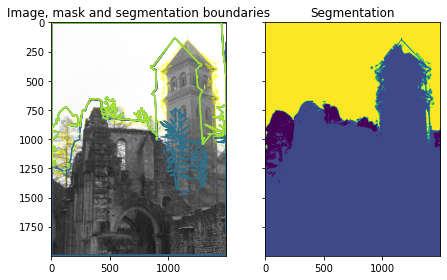

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

img = X[0][:2000, :1500, 1] # make dimensions line up
training_labels = Y[0][:, :, 1]

sigma_min = 1
sigma_max = 16
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        multichannel=True)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

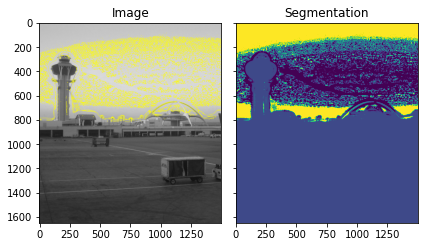

In [106]:
img_new = X[1][:2000, :1500, 1]

features_new = features_func(img_new)
result_new = future.predict_segmenter(features_new, clf)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
ax[0].imshow(segmentation.mark_boundaries(img_new, result_new, mode='thick'))
ax[0].set_title('Image')
ax[1].imshow(result_new)
ax[1].set_title('Segmentation')
fig.tight_layout()

plt.show()

# Using ProgLearn

**Define Hyperparameters**

Later we may implement methods to optimize hyperparametrization

In [65]:
# Import the packages for experiment
import warnings

warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import random
from tensorflow import keras

from itertools import product
from joblib import Parallel, delayed

In [66]:
### MAIN HYPERPARAMS ###
num_points_per_task = 500
shift_num = 6
task_num = 20
tree_num = 10
########################

**Run Experiment**

In [55]:
# based on code for Random Classification Experiment

from random_class_functions import Odif_experiment

slot_num = int(5000 / num_points_per_task)
slot_fold = range(slot_num)
shift_fold = range(1, shift_num + 1, 1)

# run the Odif model
n_trees = [tree_num]
iterable = product(n_trees, shift_fold, slot_fold)
df_results = Parallel(n_jobs=-1, verbose=0)(
    delayed(Odif_experiment)(
        X, Y, ntree, shift, slot, num_points_per_task, acorn=12345
    )
    for ntree, shift, slot in iterable
)

AttributeError: 'bool' object has no attribute 'any'

**Analyze Results**
- accuracy (ACC)
- forwards transfer efficiency (FTE)
- backwards transfer efficiency (BTE)
- overall transfer efficiency (TE)